In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Load the Dataset

In [28]:
df = pd.read_csv("World_Marriage_Dataset.csv")

# 2. Display Basic Information

In [29]:
df.head()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
0,1,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,2,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,3,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,4,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,5,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics


In [30]:
df.tail()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
271599,271600,Zimbabwe,[55-59],Woman,Widowed,Survey,2017,2017,National statistics
271600,271601,Zimbabwe,[60-64],Woman,Widowed,Survey,2017,2017,National statistics
271601,271602,Zimbabwe,[65-69],Woman,Widowed,Survey,2017,2017,National statistics
271602,271603,Zimbabwe,[70-74],Woman,Widowed,Survey,2017,2017,National statistics
271603,271604,Zimbabwe,[75+],Woman,Widowed,Survey,2017,2017,National statistics


In [31]:
df.shape

(271604, 9)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271604 entries, 0 to 271603
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Sr.No.                        271604 non-null  int64 
 1   Country                       271604 non-null  object
 2   AgeGroup                      271604 non-null  object
 3   Sex                           271604 non-null  object
 4   MaritalStatus                 271604 non-null  object
 5   DataProcess                   271604 non-null  object
 6   Data Collection (Start Year)  271604 non-null  int64 
 7   Data Collection (End Year)    271604 non-null  int64 
 8   Data Source                   271604 non-null  object
dtypes: int64(3), object(6)
memory usage: 18.6+ MB


In [33]:
df.describe()

,Sr.No.,Data Collection (Start Year),Data Collection (End Year)
count,271604.000000,271604.000000,271604.000000
mean,135802.500000,1996.961488,1997.059097
std,78405.465594,14.244590,14.284136
min,1.000000,1954.000000,1955.000000
25%,67901.750000,1986.000000,1986.000000
50%,135802.500000,2000.000000,2000.000000
75%,203703.250000,2010.000000,2010.000000
max,271604.000000,2019.000000,2019.000000


# 3. Handling Missing Values

In [34]:
missing_values = df.isnull().sum()

In [35]:
print(missing_values)

Sr.No.                          0
Country                         0
AgeGroup                        0
Sex                             0
MaritalStatus                   0
DataProcess                     0
Data Collection (Start Year)    0
Data Collection (End Year)      0
Data Source                     0
dtype: int64


In [36]:
df = df.dropna()  # Removing missing values

# 4. Checking and Removing Duplicates

In [37]:
duplicates = df.duplicated().sum()

In [38]:
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [39]:
df = df.drop_duplicates()

# 5. Define Dependent and Independent Variables

In [40]:
y = df['MaritalStatus']  # Dependent variable
x = df[['AgeGroup', 'Sex', 'Country', 'Data Collection (Start Year)', 'Data Collection (End Year)']]  # Independent variables


In [41]:
print("Dependent Variable (y):", y.name)
print("Independent Variables (x):", x.columns.tolist())

Dependent Variable (y): MaritalStatus
Independent Variables (x): ['AgeGroup', 'Sex', 'Country', 'Data Collection (Start Year)', 'Data Collection (End Year)']


# 6. Visualizing Marital Status Distribution

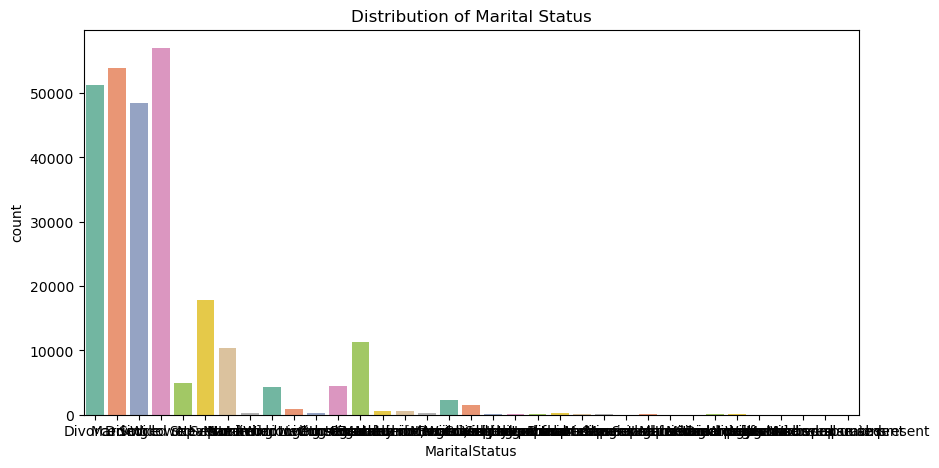

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x='MaritalStatus', data=df, palette='Set2')
plt.title('Distribution of Marital Status')
plt.show()

# 7. Marital Status Distribution by Gender

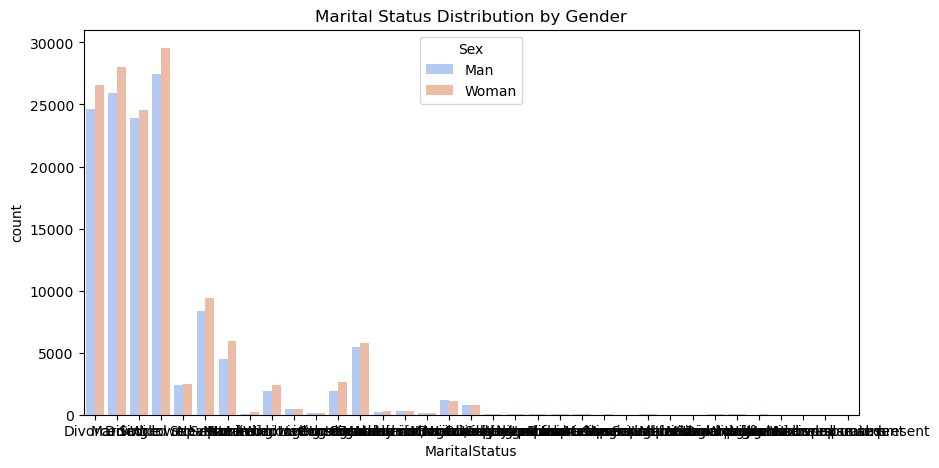

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(x='MaritalStatus', hue='Sex', data=df, palette='coolwarm')
plt.title('Marital Status Distribution by Gender')
plt.show()

# 8. Marital Status Trends Over the Years

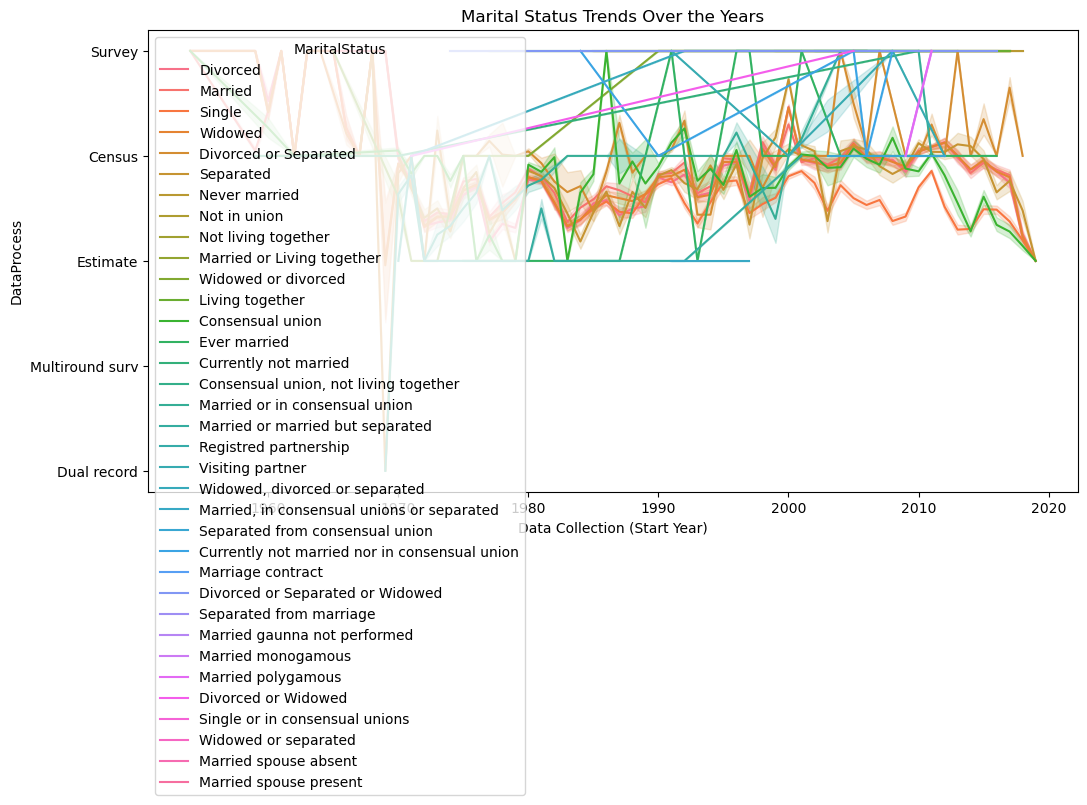

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Data Collection (Start Year)', y='DataProcess', hue='MaritalStatus')
plt.title('Marital Status Trends Over the Years')
plt.show()

# 9. Marital Status Across Age Groups

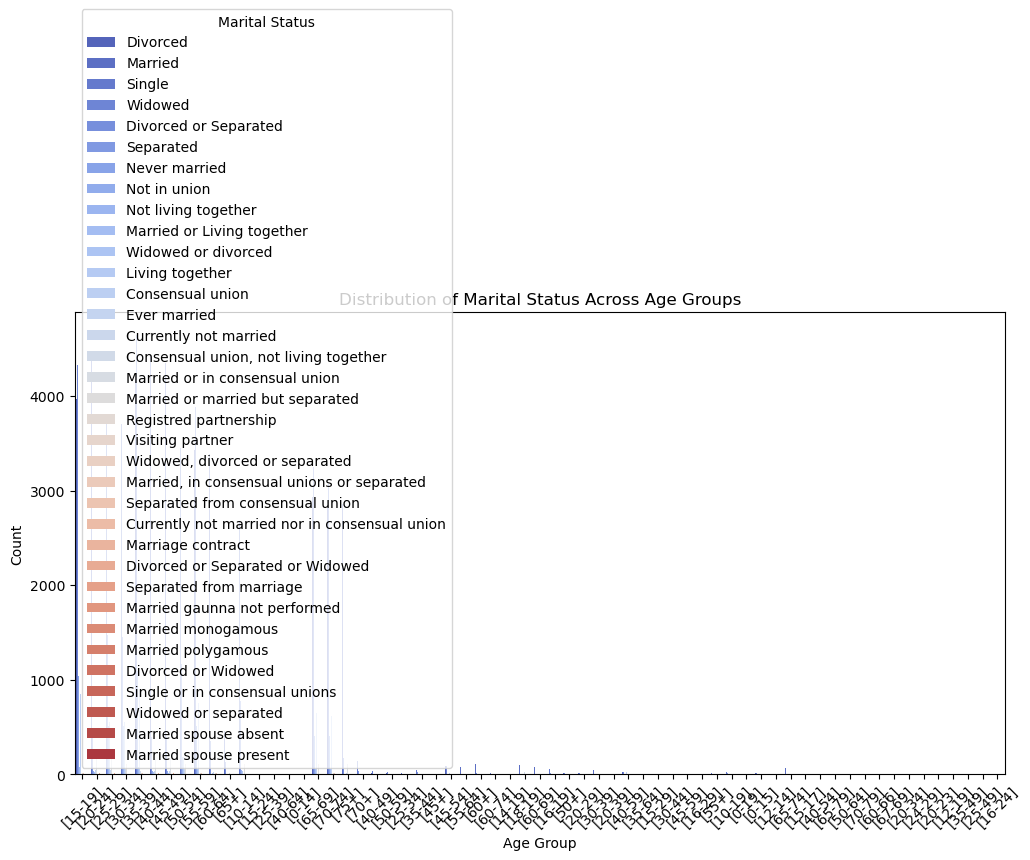

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AgeGroup', hue='MaritalStatus', palette='coolwarm')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title('Distribution of Marital Status Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()


# 10. Detecting Outliers in Age Groups

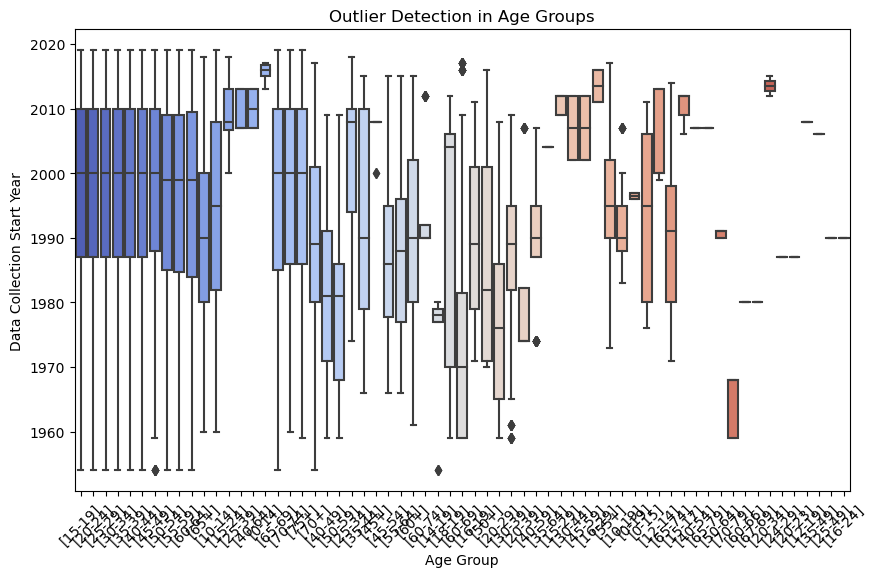

In [46]:
# Convert AgeGroup to numerical representation
age_mapping = {age: idx for idx, age in enumerate(df['AgeGroup'].unique())}
df['AgeGroupNum'] = df['AgeGroup'].map(age_mapping)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroupNum', y='Data Collection (Start Year)', palette='coolwarm')
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)
plt.title('Outlier Detection in Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Data Collection Start Year')
plt.show()



# 11 Encoding Categorical Variables for Correlation Analysis

In [47]:
label_encoder = LabelEncoder()
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Country'] = label_encoder.fit_transform(df['Country'])


# 12 Correlation Matrix After Encoding

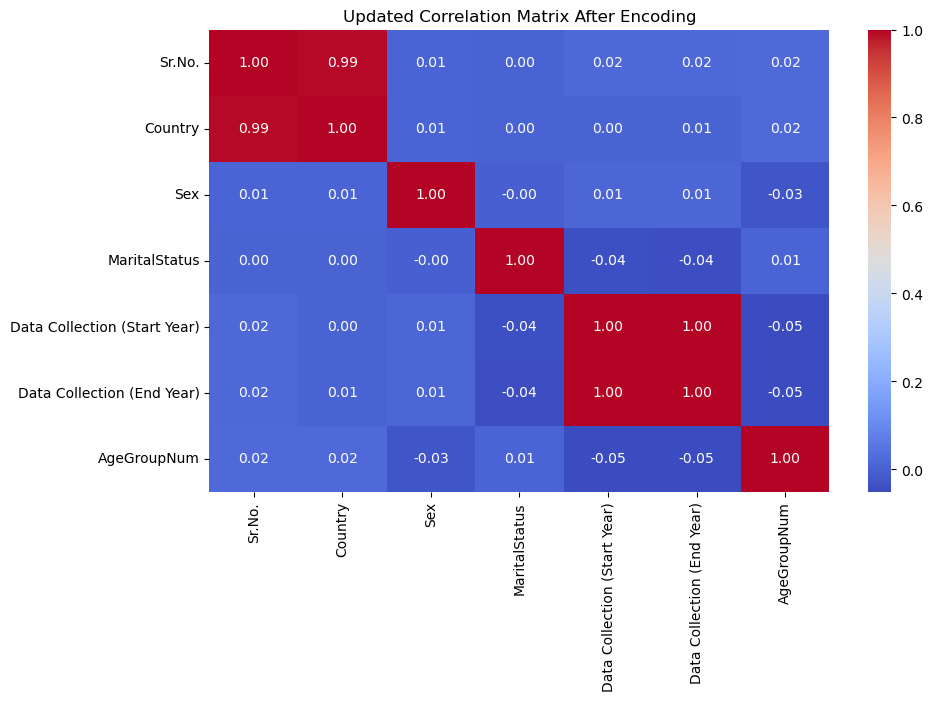

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Updated Correlation Matrix After Encoding')
plt.show()

# 13. Insights and Conclusion

In [49]:

print("Insights:")
print("- The majority of individuals are single, followed by married and divorced individuals.")
print("- Males and females show different marital status distributions, with more females in the divorced category.")
print("- The marital status trends change over time, showing fluctuations in marriage and divorce rates.")
print("- Age group analysis suggests that younger individuals are mostly single, while older age groups show higher married percentages.")


Insights:
- The majority of individuals are single, followed by married and divorced individuals.
- Males and females show different marital status distributions, with more females in the divorced category.
- The marital status trends change over time, showing fluctuations in marriage and divorce rates.
- Age group analysis suggests that younger individuals are mostly single, while older age groups show higher married percentages.
